# Networks Assignment 

---

> Nikolaos Antonopoulos <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> antonopoulosn@hotmail.com

In [101]:
import pandas as pd 
import matplotlib.pyplot as plt 
import descartes 
import geopandas as gpd 
from shapely.geometry import Point, Polygon 
%matplotlib inline 

In [102]:
street_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [103]:
songs=pd.read_csv('lat_and_long_excel.csv', sep='\;')

C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [104]:
songs = songs[['id','country','iseurop','continent','lat','long']]

In [106]:
crs = {'init':'epsg:4326'}

In [107]:
geometry = [Point(xy) for xy in zip (songs['long'],songs['lat'])]

In [108]:
geo_df = gpd.GeoDataFrame(songs, crs= crs, geometry=geometry)

C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\Νίκος\AppData\Local\Programs\Python\Python39\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


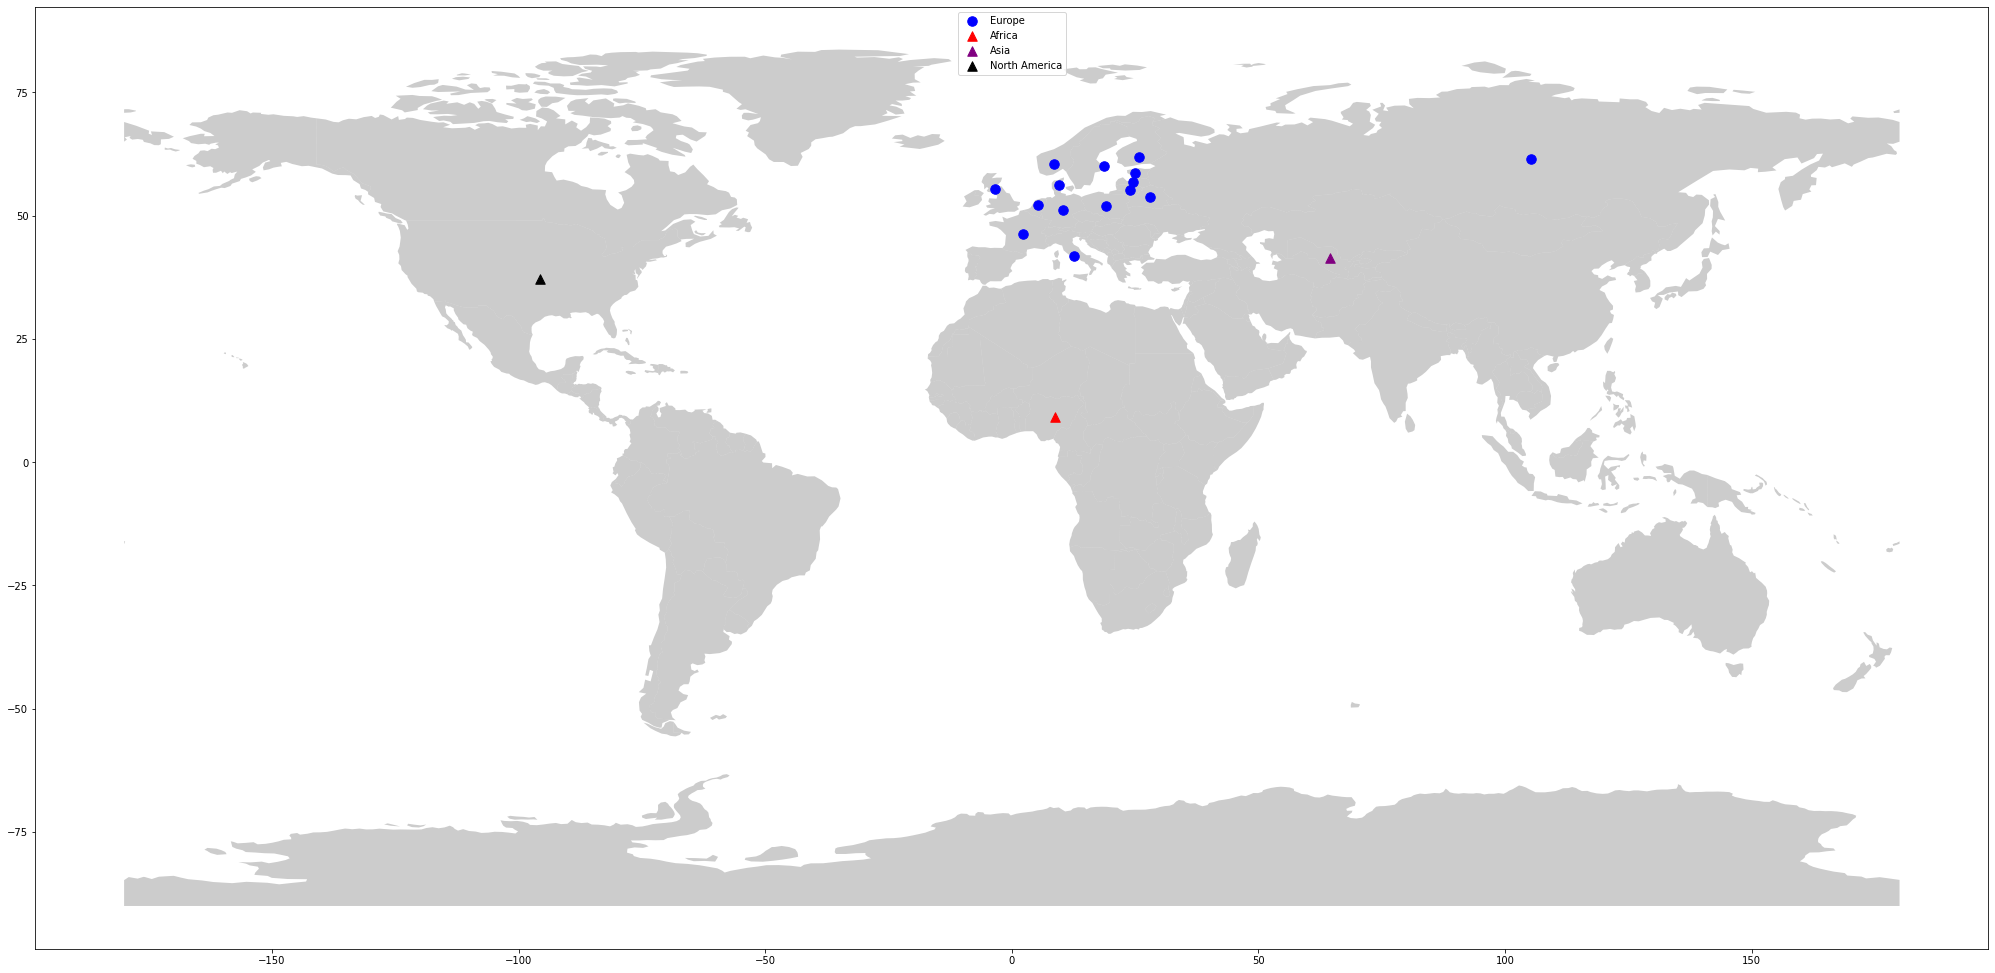

In [118]:
fig, ax = plt.subplots(figsize=(35,35))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['continent']=='EU'].plot(ax=ax,markersize=90,color = 'blue',marker = 'o',label = 'Europe')
geo_df[geo_df['continent']=='AF'].plot(ax=ax,markersize=90,color = 'red',marker = '^',label = 'Africa')
geo_df[geo_df['continent']=='AS'].plot(ax=ax,markersize=90,color = 'purple',marker = '^',label = 'Asia')
geo_df[geo_df['continent']=='NAM'].plot(ax=ax,markersize=90,color = 'k',marker = '^',label = 'North America')

plt.legend(prop={'size':15})
plt.legend(loc='upper center')  
